# CNNを用いて画像認識
CNNを用いて画像認識を行う。  
数字が入った画像を受け取って数字を認識して画像にラベル図付けしたものを返す。  


In [1]:
import google.colab.drive
google.colab.drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('/content/gdrive/My Drive/School Project/System Design Project/recognize_num/picture/num.png')
#plt.imshow(img)
np.shape(img)


(453, 799, 3)

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]

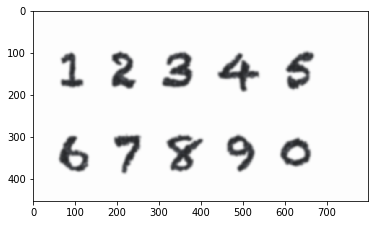

In [5]:
#平滑化

bulr_img =cv2.GaussianBlur(img,(15,15), 0)
plt.imshow(bulr_img)
bulr_img

(453, 799)


array([[253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       ...,
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253]], dtype=uint8)

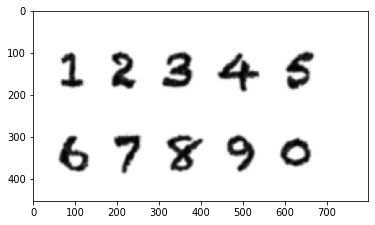

In [6]:
#グレースケール化(輪郭抽出するため)
gray_img = cv2.cvtColor(bulr_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)
print(np.shape(gray_img))
plt.gray()
gray_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

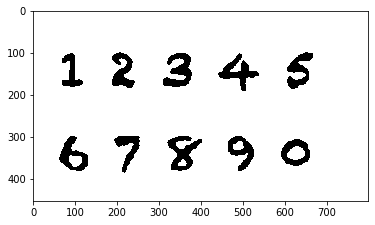

In [7]:
#2値化（輪郭抽出するためだがいらない可能性がある）
threshold_value=150
ret, thresh_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)    
np.shape(thresh_img)
plt.imshow(thresh_img)
thresh_img

In [8]:
#輪郭抽出
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
point_list = list()#座標のリスト
for i in range(0, len(contours)):
    if len(contours[i]) > 0:
        if hierarchy[0][i][3] != 0:#外側のデータだけ使う
            print("con")
            continue
        rect = contours[i]
        x, y, w, h = cv2.boundingRect(rect)
        #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 100, 0), 2)
        point_list.append([x,y,w,h])
#plt.imshow(img)

print(point_list)
print(len(point_list))

con
con
con
con
con
[[590, 302, 72, 69], [62, 298, 70, 85], [463, 296, 66, 87], [319, 296, 86, 87], [193, 296, 63, 91], [441, 100, 98, 92], [67, 99, 53, 84], [308, 98, 72, 84], [604, 97, 66, 90], [188, 97, 57, 88]]
10


In [0]:
#表示用関数
def plotimagelist(imglist):
  fig = plt.figure()
  for i in range(len(imglist)):
    ax = fig.add_subplot(len(imglist), 1,i+1)
    ax.imshow(imglist[i])
    ax.set_axis_off()
  plt.show()

In [0]:
#表示用関数
def draw_digit(data):
    size = 28
    plt.figure(figsize=(1, 1))

    X, Y = np.meshgrid(range(size),range(size))
    Z = data.reshape(size,size)   # convert from vector to 28x28 matrix
    Z = Z[::-1,:]             # flip vertical
    plt.xlim(0,27)
    plt.ylim(0,27)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

    plt.show()

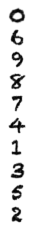

In [11]:
#画像を切り取ってimglistに格納
imglist = list()
for point in point_list:
  #plt.imshow(gray_img[point[0] : point[0]+point[2], point[1]: point[1]+point[3]])
  #plt.gray()
  imglist.append(gray_img[point[1]-10:point[1]+point[3]+10,point[0]-10:point[0]+point[2]+10])#ちょっと大きめにとる
plotimagelist(imglist)

In [12]:
#28*28の画像に圧縮
resize_imglist = list()
for i in range(len(imglist)):
  resize_imglist.append(cv2.resize(imglist[i], (28,28),0,0 ,cv2.INTER_NEAREST))
for i in range(len(imglist)):
  print(np.shape(resize_imglist[i]))


(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


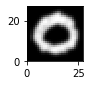

(10, 28, 28)


In [13]:
#白黒反転
rev_imglist=list()
for i in range(len(resize_imglist)):
  rev_imglist.append(cv2.bitwise_not(resize_imglist[i]))
draw_digit(rev_imglist[0])
print(np.shape(rev_imglist))

In [14]:
#2次元配列から1次元配列に変換
flat_imglist=list()
for i in range(len(rev_imglist)):
  flat_imglist.append(rev_imglist[i].flatten())
print(np.shape(flat_imglist))

(10, 784)


In [0]:
#学習済みNNを読み込み
from chainer import Sequential
import chainer.functions as F
import chainer.links as L
import chainer
from chainer import Chain
#学習データの読み込み
class CNN(Chain):
    def __init__(self):
        super(CNN, self).__init__(
            conv1 = L.Convolution2D(1, 20, 5), # filter 5
            conv2 = L.Convolution2D(20, 50, 5), # filter 5
            l1 = L.Linear(800, 500),
            l2 = L.Linear(500, 500),
            l3 = L.Linear(500, 10, initialW=np.zeros((10, 500), dtype=np.float32))
        )
    def forward(self, x):
        h = F.max_pooling_2d(F.relu(self.conv1(x)), 2)
        h = F.max_pooling_2d(F.relu(self.conv2(h)), 2)
        h = F.relu(self.l1(h))
        h = F.relu(self.l2(h))
        h = self.l3(h)
        return h
loaded_net = CNN()
chainer.serializers.load_npz('/content/gdrive/My Drive/School Project/System Design Project/recognize_num/num_cnn.net', loaded_net)


In [16]:
#データの整形listからndarray にしてfloat32変換

print(flat_imglist[0])
arr = np.array(flat_imglist[0], dtype=np.float32)
arr = arr.reshape(1, 1, 28, 28)
print(arr.dtype)
print(np.shape(arr))

[  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   4   4   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   3   7  13  23
  21   9   3   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   3   4   7  18  42  70  95  83  33  10   5   3   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   4   8  15  26  46  78 122
 157 177 151  83  50  27  10   6   3   2   2   2   2   2   2   2   2   2
   2   2   7  24  50  75 100 133 165 189 204 209 191 158 134  88  50  37
  16   4   2   2   2   2   2   2   2   2   2   6  26  79 133 164 172 185
 202 208 212 215 211 206 195 163 133 107  48  10   2   2   2   2   2   2
   2   2   4  19  70 143 190 204 194 192 204 210 214 213 212 215 207 195
 185 160  92  28   4   2   2   2   2   2   2   3  11  53 130 188 209 211
 200 197 206 206 199 191 196 205 200 196 201 193 14

In [20]:
#学習
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
  prolist = loaded_net(arr)
print(np.shape(prolist))
print(prolist.data[0][0])
print(np.argmax(prolist.array))

(1, 10)
2337.799
0


[590, 302, 72, 69]
[62, 298, 70, 85]
[463, 296, 66, 87]
[319, 296, 86, 87]
[193, 296, 63, 91]
[441, 100, 98, 92]
[67, 99, 53, 84]
[308, 98, 72, 84]
[604, 97, 66, 90]
[188, 97, 57, 88]


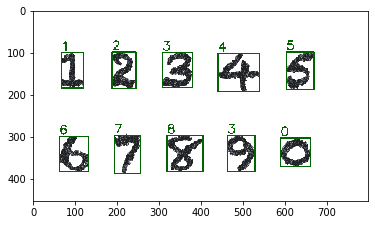

In [0]:
#pointlistを用いて元の画像にラベル付け plotlist = [x,y,w,h]
copy_img = img.copy()
plt.imshow(copy_img)
con = 0
for point in point_list :
  print(point)
  cv2.putText(copy_img, str(np.argmax(prolist[con,:].array)), (point[0], point[1]-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 0), 2, 8)
  cv2.rectangle(copy_img, (point[0], point[1]), (point[0] + point[2], point[1] + point[3]), (0, 100, 0), 2)
  con += 1
plt.imshow(copy_img)


#結果
よさげ。